In [27]:
%matplotlib widget

In [28]:
import pandas as pd
import requests
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt

In [29]:
url = f"http://ws.audioscrobbler.com/2.0/?method=chart.gettoptags&api_key={api_key}&page=1&limit=25&format=json"

response = requests.get(url)
toptags_data = response.json()

In [30]:
# pprint(toptags_data)

In [31]:
tags = toptags_data["tags"]['tag']
# tags

In [32]:
Tags_List = []
Reach_List = []
Taggings_List = []

In [33]:
for x in range(len(tags)):
    Tags_List.append(tags[x]['name'])
    Reach_List.append(tags[x]['reach'])
    Taggings_List.append(tags[x]['taggings'])

print(Tags_List)

['rock', 'electronic', 'seen live', 'alternative', 'indie', 'pop', 'female vocalists', 'metal', 'alternative rock', 'jazz', 'classic rock', 'ambient', 'experimental', 'folk', 'punk', 'indie rock', 'Hip-Hop', 'hard rock', 'black metal', 'instrumental', 'singer-songwriter', 'dance', '80s', 'death metal', 'Progressive rock']


In [34]:
tags_dict = {
    "Tags":Tags_List,
    "Reach":Reach_List,
    "Taggings":Taggings_List
}
tags_df = pd.DataFrame(tags_dict)
# reach : The number of users that have used this tag
tags_df

,Tags,Reach,Taggings
0,rock,398719,4017611
1,electronic,257581,2425310
2,seen live,82006,2154078
3,alternative,264265,2110758
4,indie,256641,2039670
5,pop,229584,2020363
6,female vocalists,168588,1617762
7,metal,156965,1275613
8,alternative rock,168187,1184512
9,jazz,148191,1168930


In [35]:
tags_df['Reach'] = tags_df['Reach'].astype(int)
tags_df['Taggings'] = tags_df['Taggings'].astype(int)

In [36]:
tags_df_reach = tags_df.sort_values('Reach',ascending=False)
tags_df_reach 

,Tags,Reach,Taggings
0,rock,398719,4017611
3,alternative,264265,2110758
1,electronic,257581,2425310
4,indie,256641,2039670
5,pop,229584,2020363
6,female vocalists,168588,1617762
8,alternative rock,168187,1184512
7,metal,156965,1275613
13,folk,149141,933003
9,jazz,148191,1168930


In [37]:
tags_df_taggings = tags_df.sort_values('Taggings',ascending=False)
tags_df_taggings

,Tags,Reach,Taggings
0,rock,398719,4017611
1,electronic,257581,2425310
2,seen live,82006,2154078
3,alternative,264265,2110758
4,indie,256641,2039670
5,pop,229584,2020363
6,female vocalists,168588,1617762
7,metal,156965,1275613
8,alternative rock,168187,1184512
9,jazz,148191,1168930


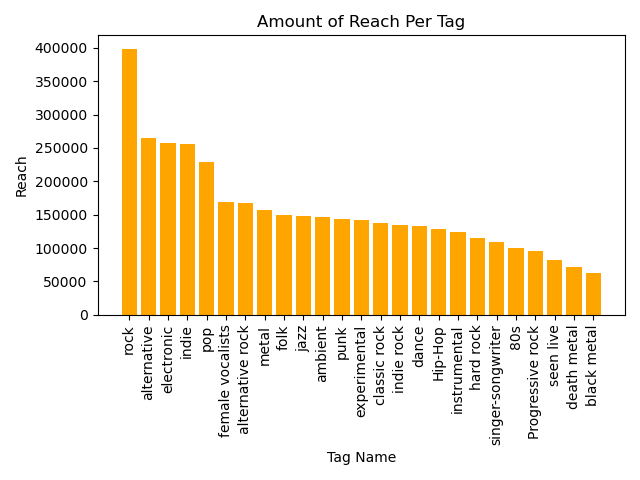

In [38]:
plt.figure(1)
plt.bar(tags_df_reach['Tags'], tags_df_reach['Reach'], color='orange',align='center') 
plt.xticks(rotation='vertical')
plt.title("Amount of Reach Per Tag")
plt.xlabel('Tag Name')
plt.ylabel('Reach')
plt.tight_layout()
plt.show()
plt.savefig(r'Resources\LastFMReachGraph.png')

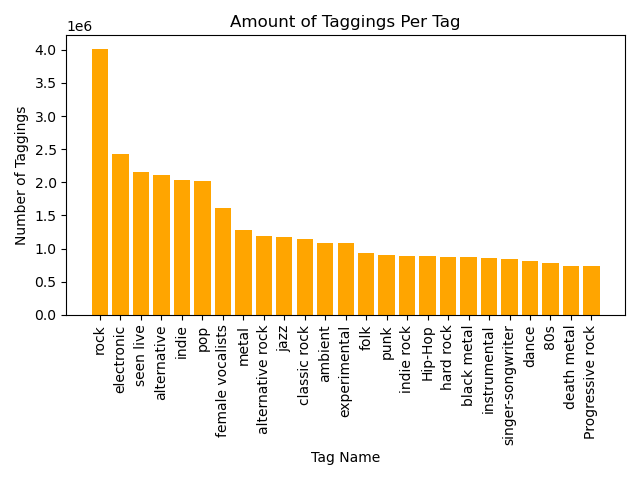

In [39]:
plt.figure(2)
plt.bar(tags_df_taggings['Tags'], tags_df_taggings['Taggings'], color='orange',align='center') 
plt.xticks(rotation='vertical')
plt.title("Amount of Taggings Per Tag")
plt.xlabel('Tag Name')
plt.ylabel('Number of Taggings')
plt.tight_layout()
plt.show()
plt.savefig(r'Resources\LastFMTaggingsGraph.png')